image shown is indexed as: 8
x_train data shape: (60000, 28, 28) y_train data shape: (60000,)


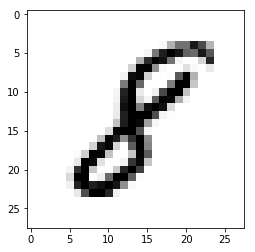

In [7]:
# import the library and the dataset
import tensorflow as tf
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test)= tf.keras.datasets.mnist.load_data()

# matplotlib inline to show the image. without this, image won't show in line. And one cannot put even the comment on the same line
%matplotlib inline 

# test the data load with the random index
image_index = 7777 
print("image shown is indexed as:", y_train[image_index])
plt.imshow(x_train[image_index], cmap='Greys')

# print out the dataset shape of x_train
print("x_train data shape:", x_train.shape, "y_train data shape:", y_train.shape)

In [14]:
# reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# making sure that the values are float so that we can get decimal after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [13]:
# Building the empty Convolutional Neural Network
# importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

# creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax)) # Final Dense layer must have 10 neurons since we have 10 number classes

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 28)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 4732)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               605824    
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1290      
Total params: 607,394
Trainable params: 607,394
Non-trainable params: 0
_________________________________________________________________


In [35]:
# Compiling and Fitting the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 24s 404us/step - loss: 0.2092 - acc: 0.9372
Epoch 2/10
60000/60000 [==============================] - 27s 451us/step - loss: 0.0842 - acc: 0.9744
Epoch 3/10
60000/60000 [==============================] - 23s 390us/step - loss: 0.0608 - acc: 0.9807
Epoch 4/10
60000/60000 [==============================] - 23s 387us/step - loss: 0.0454 - acc: 0.9851
Epoch 5/10
60000/60000 [==============================] - 23s 391us/step - loss: 0.0373 - acc: 0.9874
Epoch 6/10
60000/60000 [==============================] - 22s 372us/step - loss: 0.0295 - acc: 0.9906
Epoch 7/10
60000/60000 [==============================] - 23s 387us/step - loss: 0.0263 - acc: 0.9917
Epoch 8/10
60000/60000 [==============================] - 20s 341us/step - loss: 0.0247 - acc: 0.9917
Epoch 9/10
60000/60000 [==============================] - 20s 335us/step - loss: 0.0203 - acc: 0.9930
Epoch 10/10
60000/60000 [==============================] - 20s 336us/step - loss: 

In [36]:
# evaluate the result
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 114us/step


[0.05895016842556288, 0.985]

Prediction for image number 4444 is 9


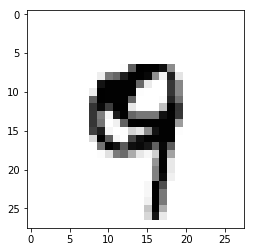

In [37]:
# evaluate individual image
image_index = 4444
img_rows = 28
img_cols = 28
plt.imshow(x_test[image_index].reshape(28, 28), cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, img_rows, img_cols, 1))
print("Prediction for image number %d is" %image_index, pred.argmax())

Prediction for image number 10 is 0


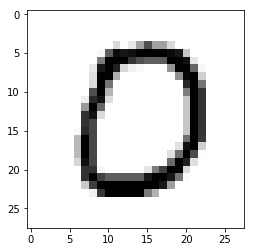

Prediction for image number 20 is 9


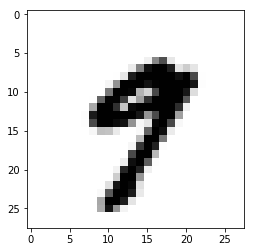

Prediction for image number 30 is 3


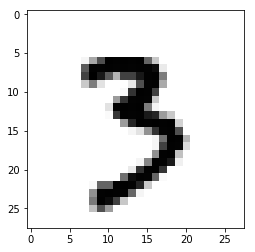

Prediction for image number 40 is 1


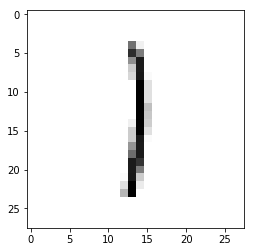

Prediction for image number 50 is 6


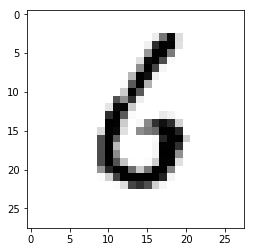

Prediction for image number 60 is 7


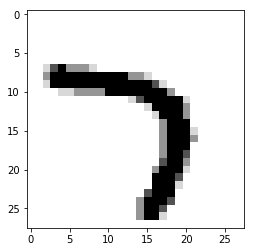

Prediction for image number 70 is 7


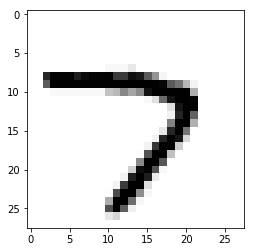

Prediction for image number 80 is 7


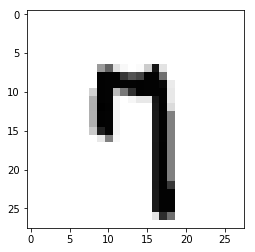

Prediction for image number 90 is 3


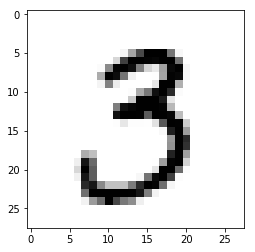

In [38]:
# show couple images in the test set
plt.figure()
for i in range(1,10):
    image_index = 10*i
    plt.imshow(x_test[image_index].reshape(28, 28), cmap='Greys')
    pred = model.predict(x_test[image_index].reshape(1, img_rows,img_cols,1))
    print("Prediction for image number %d is" %image_index, pred.argmax())
    plt.show() # lets image to show every loop iteration
